In [1]:
pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 11.3 MB/s 
     |████████████████████████████████| 43 kB 866 kB/s 
     |████████████████████████████████| 7.0 MB 58.7 MB/s 
     |████████████████████████████████| 2.0 MB 53.3 MB/s 
     |████████████████████████████████| 106 kB 70.6 MB/s 
     |████████████████████████████████| 62 kB 382 kB/s 
     |████████████████████████████████| 1.4 MB 50.0 MB/s 
     |████████████████████████████████| 72 kB 422 kB/s 
     |████████████████████████████████| 280 kB 61.6 MB/s 
     |████████████████████████████████| 44 kB 904 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 141 kB 82.6 MB/s 
     |████████████████████████████████| 11.2 MB 68.2 MB/s 
     |████████████████████████████████| 3.3 MB 54.4 MB/s 
     |██████████████████████

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/finaldf.csv')

In [4]:
df = df*1

In [5]:
df.head()

,Unnamed: 0,id,fecha_evento,planeado,lugar,intrusion,evento_y
0,0,1,12/27/2021,0,AF,1,sistema desarmado x usuario
1,1,50,11/25/2021,0,OC,1,sistema desarmado x usuario
2,2,86,11/14/2021,1,SA,1,sistema desarmado x usuario
3,3,206,9/11/2021,1,AS,0,sistema desarmado x usuario
4,4,280,9/21/2021,0,OC,1,sistema desarmado x usuario


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4067 entries, 0 to 4066
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4067 non-null   int64 
 1   id            4067 non-null   int64 
 2   fecha_evento  4067 non-null   object
 3   planeado      4067 non-null   int64 
 4   lugar         4067 non-null   object
 5   intrusion     4067 non-null   int64 
 6   evento_y      4067 non-null   object
dtypes: int64(4), object(3)
memory usage: 222.5+ KB


In [12]:
df['fecha_evento'] = pd.to_datetime(df['fecha_evento'], format='%m/%d/%Y')

In [13]:
df.head()

,Unnamed: 0,id,fecha_evento,planeado,lugar,intrusion,evento_y
0,0,1,2021-12-27,0,AF,1,sistema desarmado x usuario
1,1,50,2021-11-25,0,OC,1,sistema desarmado x usuario
2,2,86,2021-11-14,1,SA,1,sistema desarmado x usuario
3,3,206,2021-09-11,1,AS,0,sistema desarmado x usuario
4,4,280,2021-09-21,0,OC,1,sistema desarmado x usuario


In [15]:
from pycaret.classification import *
s = setup(df, target = 'intrusion')

,Description,Value
0,Session id,4852
1,Target,intrusion
2,Target type,Binary
3,Original data shape,"(4067, 7)"
4,Transformed data shape,"(4067, 12)"
5,Transformed train set shape,"(2846, 12)"
6,Transformed test set shape,"(1221, 12)"
7,Numeric features,3
8,Date features,1
9,Categorical features,2


In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6188,0.6942,0.6229,0.6303,0.6257,0.2373,0.2379,0.4870
rf,Random Forest Classifier,0.5748,0.6092,0.6119,0.5816,0.5955,0.1478,0.1486,0.4940
lda,Linear Discriminant Analysis,0.5418,0.5476,0.6167,0.5476,0.5795,0.0799,0.0809,0.1000
ridge,Ridge Classifier,0.5404,0.0000,0.6181,0.5459,0.5793,0.0769,0.0781,0.0770
knn,K Neighbors Classifier,0.5306,0.5417,0.5503,0.5416,0.5456,0.0602,0.0603,0.3040
nb,Naive Bayes,0.5278,0.5399,0.4764,0.5458,0.5080,0.0581,0.0587,0.0980
lr,Logistic Regression,0.5239,0.5349,0.6201,0.5300,0.5709,0.0428,0.0441,0.8630
dummy,Dummy Classifier,0.5134,0.5000,1.0000,0.5134,0.6784,0.0000,0.0000,0.0970
ada,Ada Boost Classifier,0.5133,0.5118,0.5954,0.5229,0.5531,0.0223,0.0230,0.2040
dt,Decision Tree Classifier,0.5116,0.5109,0.5366,0.5238,0.5290,0.0217,0.0220,0.1080


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [17]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4852, verbose=0, warm_start=False)


In [23]:
!python -m pip uninstall matplotlib

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3


In [24]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 13.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc4 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

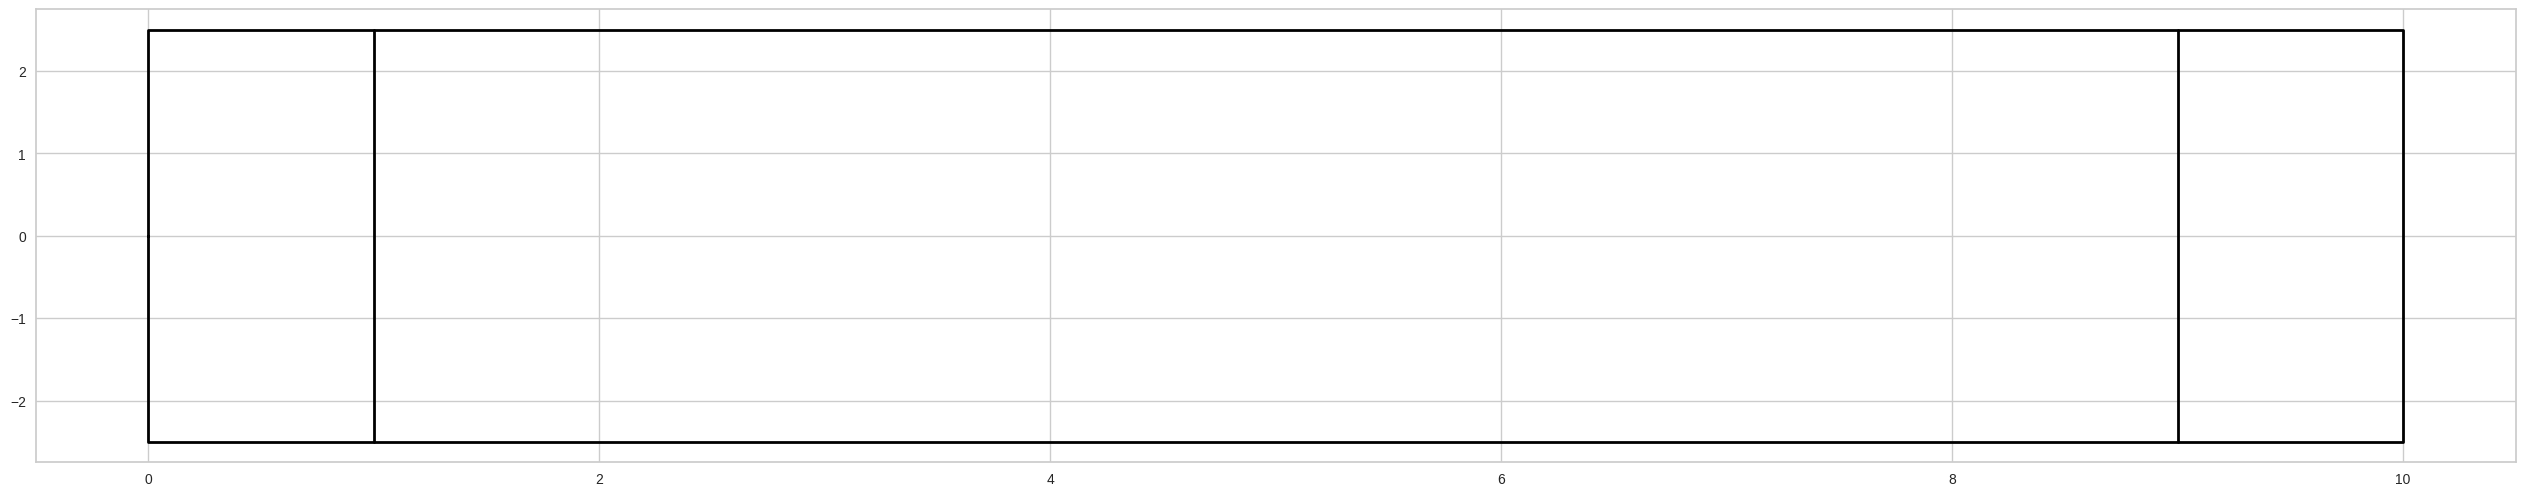

In [26]:
evaluate_model(best)

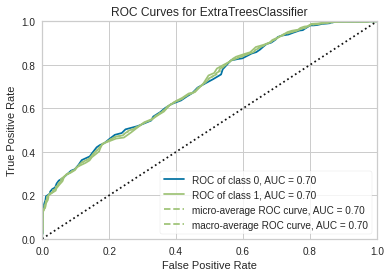

In [27]:
plot_model(best, plot = 'auc')

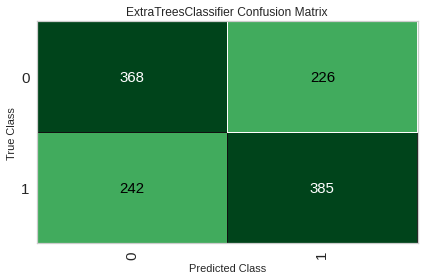

In [28]:
plot_model(best, plot = 'confusion_matrix')

In [29]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6167,0.7001,0.6140,0.6301,0.6220,0.2334,0.2335


,Unnamed: 0,id,fecha_evento_month,fecha_evento_day,planeado,lugar_SA,lugar_EU,lugar_AF,lugar_AS,lugar_OC,evento_y,intrusion,prediction_label,prediction_score
2846,375.0,793.0,7.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.557522,0,0,0.87
2847,3446.0,478.0,9.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.545455,0,0,0.60
2848,1107.0,801.0,10.0,27.0,0.0,0.0,1.0,0.0,0.0,0.0,0.524752,0,0,0.71
2849,540.0,536.0,7.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.547170,1,1,0.95
2850,4006.0,82.0,12.0,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.421569,0,1,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,3750.0,130.0,8.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.512821,1,1,0.56
4063,3569.0,919.0,7.0,13.0,1.0,0.0,0.0,0.0,1.0,0.0,0.535354,0,0,0.59
4064,1376.0,589.0,11.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.500000,1,1,0.59
4065,3468.0,224.0,12.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.535354,0,0,0.51


In [31]:
predictions = predict_model(best, data=df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9420,0.9909,0.9377,0.9486,0.9432,0.8839,0.8840


,Unnamed: 0,id,fecha_evento_month,fecha_evento_day,planeado,lugar_SA,lugar_EU,lugar_AF,lugar_AS,lugar_OC,evento_y,intrusion,prediction_label,prediction_score
0,0.0,1.0,12.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,0.508772,1,1,0.86
1,1.0,50.0,11.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.508772,1,1,0.66
2,2.0,86.0,11.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.508772,1,1,1.00
3,3.0,206.0,9.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.517544,0,0,1.00
4,4.0,280.0,9.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.508772,1,1,1.00


In [33]:
predictions = predict_model(best, data=df, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9420,0.9909,0.9377,0.9486,0.9432,0.8839,0.8840


,Unnamed: 0,id,fecha_evento_month,fecha_evento_day,planeado,lugar_SA,lugar_EU,lugar_AF,lugar_AS,lugar_OC,evento_y,intrusion,prediction_label,prediction_score_0,prediction_score_1
0,0.0,1.0,12.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,0.508772,1,1,0.14,0.86
1,1.0,50.0,11.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.508772,1,1,0.34,0.66
2,2.0,86.0,11.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.508772,1,1,0.00,1.00
3,3.0,206.0,9.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.517544,0,0,1.00,0.00
4,4.0,280.0,9.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.508772,1,1,0.00,1.00


In [34]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['fecha_evento'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', 'id', 'planeado'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=Tr...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
     

In [35]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['fecha_evento'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Unnamed: 0', 'id', 'planeado'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=Tr...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      ma